In [1]:
%matplotlib inline
import matplotlib.pylab as plt

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

from datetime import datetime
from scipy.cluster.hierarchy import dendrogram, linkage
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import pairwise_distances
from math import sqrt
from scipy.spatial.distance import squareform

In [2]:
words = pd.read_csv('data/50words_TEST.csv', index_col = 0, header = None)

### Let's take a look at some of the words 'on average'

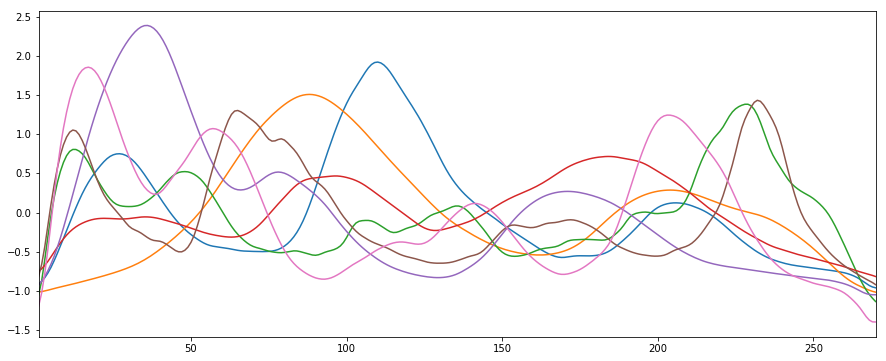

In [3]:
for i in range(7):
    row = words.groupby(words.index).mean().iloc[i]
    row.plot()

### We can also check to see whether the 'average' matches the individual plot for a given type

First, the 'average'

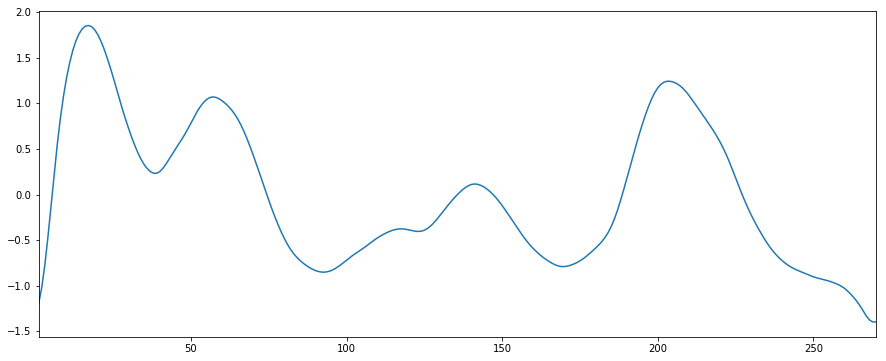

In [4]:
word_type = 7
row = words.groupby(words.index).mean().iloc[word_type-1]
row.plot()

Next the full sample of all those words

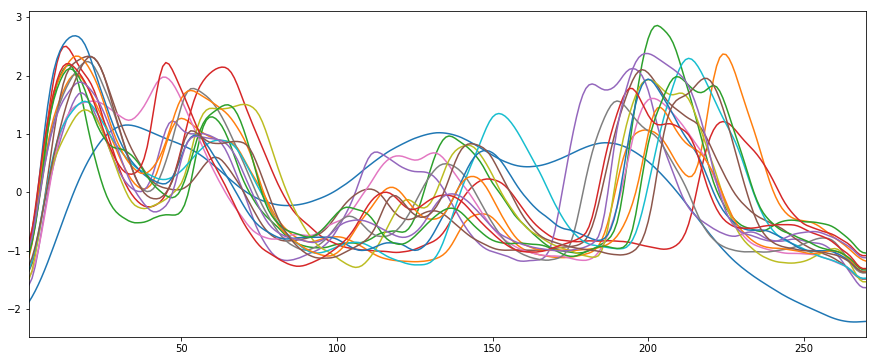

In [5]:
for i in range(words[words.index == word_type].shape[0]):
    row = words[words.index == word_type].iloc[i]
    row.plot()

### Let's try to code up the sensible distance function to describe the distance between two times series

In [6]:
# %load snippets/dtwdistance.py
#courtesy https://en.wikipedia.org/wiki/Dynamic_time_warping

def DTWDistance(s1, s2):
    DTW={}

    for i in range(len(s1)):
        DTW[(i, -1)] = float('inf')
    for i in range(len(s2)):
        DTW[(-1, i)] = float('inf')
    DTW[(-1, -1)] = 0

    for i in range(len(s1)):
        for j in range(len(s2)):
            dist= (s1[i]-s2[j])**2
            DTW[(i, j)] = dist + min(DTW[(i-1, j)],DTW[(i, j-1)], DTW[(i-1, j-1)])

    return sqrt(DTW[len(s1)-1, len(s2)-1])

In [7]:
chosen_words = words[words.index == word_type]
s1 = chosen_words.iloc[2]
s2 = chosen_words.iloc[3]
print(type(s1))
DTWDistance(s1.values, s2.values)

<class 'pandas.core.series.Series'>


6.58261365073929

In [8]:
s3 = words.iloc[0]
DTWDistance(s1.values, s3.values)

11.099002878491204

In [9]:
s3 = words.iloc[0]
DTWDistance(s2.values, s3.values)

10.501580760094857

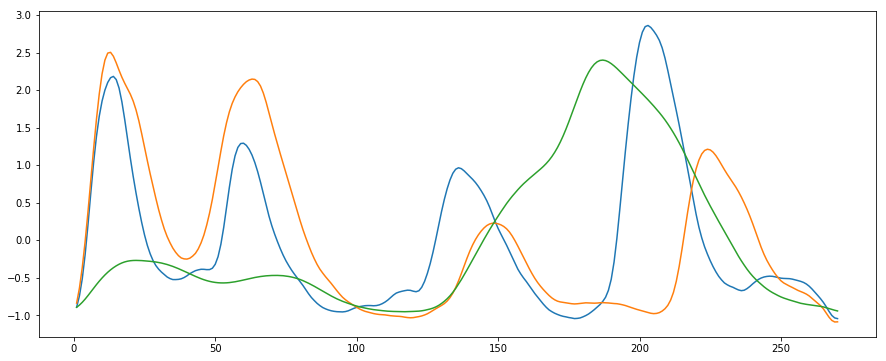

In [10]:
plt.plot(s1)
plt.plot(s2)
plt.plot(s3)

### Compare the performance of Euclidean distance with that of DTDW for s1, s2, s3 as specified above

In [11]:
# %load snippets/euclidedistance.py
def EuclidDistance(s1, s2):
    sum_squares = 0
    for i in range(len(s1)):
        sum_squares = sum_squares + (s1[i] - s2[i])**2
    return sqrt(sum_squares)

In [13]:
EuclidDistance(s1.values, s2.values)

18.48947144447024

In [14]:
EuclidDistance(s1.values, s3.values)

19.784487231766917

In [15]:
EuclidDistance(s2.values, s3.values)

25.452544931489548

### Can you classify a random row by determining which 'mean' curve it is closest to? How successful is this?

In [16]:
# %load snippets/nearestmean.py
from random import randint

def test_idea(words_df):
    distances = []
    mean_words = words_df.groupby(words_df.index).mean()
    i = randint(0, words_df.shape[0])
    random_word = words_df.iloc[i]
    for mean_idx in range(mean_words.shape[0]):
        current_mean_word = mean_words.iloc[mean_idx]
        distances.append(DTWDistance(current_mean_word.values, random_word.values))
    return (random_word.name, distances)

word_type, distances = test_idea(words)
indexed_distances = enumerate(distances)
word_type
list(indexed_distances)

[(0, 8.58411853586614),
 (1, 11.228325499105331),
 (2, 10.166617569685009),
 (3, 12.249056233918328),
 (4, 10.275864651509773),
 (5, 8.838922139645623),
 (6, 9.527032562197084),
 (7, 8.040582411434249),
 (8, 10.508946247037024),
 (9, 8.770845106085934),
 (10, 9.911694317939643),
 (11, 11.679713737792785),
 (12, 10.154355694078518),
 (13, 9.686662711733458),
 (14, 8.691710237042233),
 (15, 8.403030140847015),
 (16, 10.996944551459158),
 (17, 7.989003610588903),
 (18, 8.55193609330823),
 (19, 12.060261074376943),
 (20, 11.250953021907597),
 (21, 10.682708773965519),
 (22, 8.643595648706816),
 (23, 8.97475874037379),
 (24, 9.778922863018286),
 (25, 7.6616003946282625),
 (26, 7.4597238093598754),
 (27, 8.701717202063568),
 (28, 9.858965856497864),
 (29, 9.000016784747851),
 (30, 6.509060561049375),
 (31, 6.676759357352202),
 (32, 11.052729070340707),
 (33, 6.657138086951353),
 (34, 9.449533077526148),
 (35, 9.45090632784692),
 (36, 8.665860564066625),
 (37, 9.59694579226246),
 (38, 5.82235